<a href="https://colab.research.google.com/github/Eddy09246/Movies-Analysis-and-Linear-Regression/blob/main/Movies_Analysis_and_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

Do higher film budgets lead to more box office revenue? Let's find out if there's a relationship using the movie budgets and financial performance data that I've scraped from [the-numbers.com](https://www.the-numbers.com/movie/budgets) on Dec 7,2024 .



# Import Statements

In [186]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.linear_model import LinearRegression

# Notebook Presentation

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Read Data

In [ ]:
data = pd.read_csv('all_movie_data.csv', names=['Release_Date', 'Movie_Title', 'USD_Production_Budget', 'USD_Domestic_Gross_In_US', 'USD_Worldwide_Gross'], header=0)

# Explore and Clean the Data


1. How many rows and columns does the dataset contain?
2. Exploy the first and last 5 rows of the dataset
3. Are there any NaN(missing values) values present?
4. Are there any duplicate rows?
5. What are the data types of the columns?

In [ ]:
data.shape

(6549, 5)

In [ ]:
data.head()

,Release_Date,Movie_Title,USD_Production_Budget,USD_Domestic_Gross_In_US,USD_Worldwide_Gross
1,"Dec 16, 2015",Star Wars Ep. VII: The Force Awakens,"$533,200,000","$936,662,225","$2,056,046,835"
2,"Dec 9, 2022",Avatar: The Way of Water,"$460,000,000","$684,075,767","$2,317,514,386"
3,"Jun 28, 2023",Indiana Jones and the Dial of Destiny,"$402,300,000","$174,480,468","$383,963,057"
4,"Apr 23, 2019",Avengers: Endgame,"$400,000,000","$858,373,000","$2,748,242,781"
5,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$379,000,000","$241,071,802","$1,045,713,802"


In [ ]:
data.tail()

,Release_Date,Movie_Title,USD_Production_Budget,USD_Domestic_Gross_In_US,USD_Worldwide_Gross
"6,545","Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
"6,546","Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
"6,547","Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0
"6,548","Aug 5, 2005",My Date With Drew,"$1,100","$181,041","$181,041"
"6,549","Mar 2, 2021",Neeras,$86,$0,$0


In [ ]:
data.sample(5)

,Release_Date,Movie_Title,USD_Production_Budget,USD_Domestic_Gross_In_US,USD_Worldwide_Gross
"3,166","Apr 28, 2017",The Circle,"$18,000,000","$20,497,844","$45,497,689"
"2,941","May 11, 2007",Georgia Rule,"$20,000,000","$18,882,880","$20,819,601"
"6,048","Jul 28, 1954",On the Waterfront,"$910,000","$9,600,000","$9,609,459"
"2,637","Oct 4, 2011",La véritable histoire du Chat Botté,"$25,000,000",$0,"$8,208,594"
"4,745","Sep 5, 2008","Surfer, Dude","$6,000,000","$36,497","$36,497"


In [ ]:
data.isna().values.any()

False

In [ ]:
data.isna().sum()

,0
Release_Date,0
Movie_Title,0
USD_Production_Budget,0
USD_Domestic_Gross_In_US,0
USD_Worldwide_Gross,0


In [ ]:
data.duplicated().sum()

0

In [ ]:
data.dtypes

,0
Release_Date,object
Movie_Title,object
USD_Production_Budget,object
USD_Domestic_Gross_In_US,object
USD_Worldwide_Gross,object


In [ ]:
data.describe()

,Release_Date,Movie_Title,USD_Production_Budget,USD_Domestic_Gross_In_US,USD_Worldwide_Gross
count,6549,6549,6549,6549,6549
unique,3244,6443,568,5766,6084
top,Unknown,King Kong,"$20,000,000",$0,$0
freq,115,3,255,715,418


### Data Type Conversions

In [ ]:
columns_to_clean = ['USD_Production_Budget',
                    'USD_Worldwide_Gross',
                    'USD_Domestic_Gross_In_US']
for col in columns_to_clean:
  data[col] = data[col].astype(str).str.replace('$', '', regex=False).str.replace(',', '', regex=False)
  data[col] = pd.to_numeric(data[col])

In [ ]:
data.head(10)

,Release_Date,Movie_Title,USD_Production_Budget,USD_Domestic_Gross_In_US,USD_Worldwide_Gross
1,"Dec 16, 2015",Star Wars Ep. VII: The Force Awakens,533200000,936662225,2056046835
2,"Dec 9, 2022",Avatar: The Way of Water,460000000,684075767,2317514386
3,"Jun 28, 2023",Indiana Jones and the Dial of Destiny,402300000,174480468,383963057
4,"Apr 23, 2019",Avengers: Endgame,400000000,858373000,2748242781
5,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,379000000,241071802,1045713802
6,"Apr 22, 2015",Avengers: Age of Ultron,365000000,459005868,1395316979
7,"May 17, 2023",Fast X,340000000,146126015,714567285
8,"May 23, 2018",Solo: A Star Wars Story,330400000,213767512,393151347
9,"Apr 25, 2018",Avengers: Infinity War,300000000,678815482,2048359754
10,"May 24, 2007",Pirates of the Caribbean: At World’s End,300000000,309420425,960996492


Convert the `Release_Date` column to a Pandas Datetime type.
First drop rows where `Release_Date` does not have the month or Unknown.

In [ ]:
data[data.Release_Date == 'Unknown']

,Release_Date,Movie_Title,USD_Production_Budget,USD_Domestic_Gross_In_US,USD_Worldwide_Gross
291,Unknown,Desert Warrior,140000000,0,0
909,Unknown,b,70000000,0,0
910,Unknown,Marty Supreme,70000000,0,0
"1,411",Unknown,Hannibal the Conqueror,50000000,0,0
"1,590",Unknown,Les Bronzés 3: amis pour la vie,42000000,0,83833602
...,...,...,...,...,...
"6,517",Unknown,Dry Spell,22000,0,0
"6,520",Unknown,Flywheel,20000,0,0
"6,528",Unknown,Stories of Our Lives,15000,0,0
"6,531",Unknown,Tin Can Man,12000,0,0


In [ ]:
data[data.Release_Date == '2025']

,Release_Date,Movie_Title,USD_Production_Budget,USD_Domestic_Gross_In_US,USD_Worldwide_Gross
"1,412",2025,Horizon: An American Saga Chapter 2,50000000,0,0


In [ ]:
data[data.Release_Date == '1980']

,Release_Date,Movie_Title,USD_Production_Budget,USD_Domestic_Gross_In_US,USD_Worldwide_Gross
"2,006",1980,Lion of the Desert,35000000,1500000,1502136
"5,229",1980,Terror Train,3500000,8000000,8000000
"6,263",1980,Maniac,350000,10000000,10000000


In [ ]:
data['Release_Date'] = pd.to_datetime(data['Release_Date'], format='%b %d, %Y', errors='coerce')
data.dropna(subset=['Release_Date'], inplace=True)
data

,Release_Date,Movie_Title,USD_Production_Budget,USD_Domestic_Gross_In_US,USD_Worldwide_Gross
1,2015-12-16,Star Wars Ep. VII: The Force Awakens,533200000,936662225,2056046835
2,2022-12-09,Avatar: The Way of Water,460000000,684075767,2317514386
3,2023-06-28,Indiana Jones and the Dial of Destiny,402300000,174480468,383963057
4,2019-04-23,Avengers: Endgame,400000000,858373000,2748242781
5,2011-05-20,Pirates of the Caribbean: On Stranger Tides,379000000,241071802,1045713802
...,...,...,...,...,...
"6,545",1999-04-02,Following,6000,48482,240495
"6,546",2005-07-13,Return to the Land of Wonders,5000,1338,1338
"6,547",2015-09-29,A Plague So Pleasant,1400,0,0
"6,548",2005-08-05,My Date With Drew,1100,181041,181041


In [ ]:
data.dtypes

,0
Release_Date,datetime64[ns]
Movie_Title,object
USD_Production_Budget,int64
USD_Domestic_Gross_In_US,int64
USD_Worldwide_Gross,int64


### Descriptive Statistics

1. What is the average production budget of the films in the data set?
2. What is the average worldwide gross revenue of films?
3. What were the minimums for worldwide and domestic revenue?
4. Are the bottom 25% of films actually profitable or do they lose money?
5. What are the highest production budget and highest worldwide gross revenue of any film?
6. How much revenue did the lowest and highest budget films make?

In [ ]:
data.describe()

,Release_Date,USD_Production_Budget,USD_Domestic_Gross_In_US,USD_Worldwide_Gross
count,6400,"6,400.00","6,400.00","6,400.00"
mean,2006-01-04 01:04:07.500000,"33,454,883.68","43,327,307.67","96,300,307.22"
min,1915-02-08 00:00:00,86.00,0.00,0.00
25%,2000-12-22 00:00:00,"5,000,000.00","1,435,329.75","4,591,150.00"
50%,2008-06-16 12:00:00,"17,800,000.00","17,289,616.50","29,103,382.50"
75%,2014-11-14 00:00:00,"40,000,000.00","53,067,406.00","100,520,608.50"
max,2026-10-15 00:00:00,"533,200,000.00","936,662,225.00","2,923,706,026.00"
std,NaN,"45,013,896.43","73,356,240.31","189,138,889.69"


In [ ]:
data[data.USD_Production_Budget==data.USD_Production_Budget.min()]

,Release_Date,Movie_Title,USD_Production_Budget,USD_Domestic_Gross_In_US,USD_Worldwide_Gross
"6,549",2021-03-02,Neeras,86,0,0


In [ ]:
data[data.USD_Production_Budget==data.USD_Production_Budget.max()]


,Release_Date,Movie_Title,USD_Production_Budget,USD_Domestic_Gross_In_US,USD_Worldwide_Gross
1,2015-12-16,Star Wars Ep. VII: The Force Awakens,533200000,936662225,2056046835


# Investigating the Zero Revenue Films

How many films grossed $0 domestically (i.e., in the United States)? What were the highest budget films that grossed nothing?

In [ ]:
zero_domestic = data[data.USD_Domestic_Gross_In_US == 0]

In [ ]:
print(f'Number of films that grossed $0 domestically {len(zero_domestic)}')
zero_domestic.sort_values(by='USD_Production_Budget', ascending=False)

Number of films that grossed $0 domestically 598


,Release_Date,Movie_Title,USD_Production_Budget,USD_Domestic_Gross_In_US,USD_Worldwide_Gross
103,2020-09-04,Mulan,200000000,0,69973540
105,2022-07-13,The Gray Man,200000000,0,451178
104,2021-07-02,The Tomorrow War,200000000,0,19220000
204,2019-11-01,The Irishman,159000000,0,914706
265,2019-12-13,6 Underground,150000000,0,0
...,...,...,...,...,...
"6,523",2011-11-25,The Ridges,17300,0,0
"6,538",2015-05-19,Family Motocross,10000,0,0
"6,544",2022-03-01,Red 11,7000,0,0
"6,547",2015-09-29,A Plague So Pleasant,1400,0,0


How many films grossed $0 worldwide? What are the highest budget films that had no revenue internationally?

In [ ]:
zero_worldwide = data[data.USD_Worldwide_Gross == 0]
print(f'Number of films that grossed $0 worldwide {len(zero_worldwide)}')
zero_worldwide.sort_values('USD_Production_Budget', ascending=False)

Number of films that grossed $0 worldwide 330


,Release_Date,Movie_Title,USD_Production_Budget,USD_Domestic_Gross_In_US,USD_Worldwide_Gross
264,2024-07-03,Beverly Hills Cop: Axel F,150000000,0,0
265,2019-12-13,6 Underground,150000000,0,0
385,2018-11-09,Outlaw King,120000000,0,0
386,2022-12-02,Emancipation,120000000,0,0
398,2019-03-06,Triple Frontier,115000000,0,0
...,...,...,...,...,...
"6,523",2011-11-25,The Ridges,17300,0,0
"6,538",2015-05-19,Family Motocross,10000,0,0
"6,544",2022-03-01,Red 11,7000,0,0
"6,547",2015-09-29,A Plague So Pleasant,1400,0,0


### Filtering on Multiple Conditions

In [ ]:
films_with_zero_domestic_but_not_zero_worldwide = data[(data.USD_Worldwide_Gross != 0) & (data.USD_Domestic_Gross_In_US == 0)]
films_with_zero_domestic_but_not_zero_worldwide

,Release_Date,Movie_Title,USD_Production_Budget,USD_Domestic_Gross_In_US,USD_Worldwide_Gross
103,2020-09-04,Mulan,200000000,0,69973540
104,2021-07-02,The Tomorrow War,200000000,0,19220000
105,2022-07-13,The Gray Man,200000000,0,451178
204,2019-11-01,The Irishman,159000000,0,914706
263,2021-11-04,Red Notice,150000000,0,173638
...,...,...,...,...,...
"6,423",2011-09-09,Grave Encounters,120000,0,3613222
"6,459",2013-04-11,Absentia,70000,0,8555
"6,493",2020-12-01,Host,35000,0,436536
"6,512",2015-07-17,Exeter,25000,0,489792


In [ ]:
international_releases = data.query('USD_Domestic_Gross_In_US == 0 and USD_Worldwide_Gross != 0')
print(f'Number of international releases: {len(international_releases)}')
international_releases.tail()

Number of international releases: 268


,Release_Date,Movie_Title,USD_Production_Budget,USD_Domestic_Gross_In_US,USD_Worldwide_Gross
"6,423",2011-09-09,Grave Encounters,120000,0,3613222
"6,459",2013-04-11,Absentia,70000,0,8555
"6,493",2020-12-01,Host,35000,0,436536
"6,512",2015-07-17,Exeter,25000,0,489792
"6,519",2019-08-09,Socrates,20000,0,849


### Unreleased Films

* Identify which films were not released yet as of the time of data collection (Dec 7, 2024).
* How many films are included in the dataset that have not yet had a chance to be screened in the box office?
* Create another DataFrame called data_clean that does not include these films.

In [ ]:
# Date of Data Collection
scrape_date = pd.Timestamp('2024-12-7')

In [ ]:
future_releases = data[data.Release_Date >= scrape_date]
future_releases

,Release_Date,Movie_Title,USD_Production_Budget,USD_Domestic_Gross_In_US,USD_Worldwide_Gross
"4,762",2025-06-26,Doktor Dinozavrov (Доктор Динозавров)…,5900000,0,0
"4,998",2026-10-15,Time,5000000,0,0


In [ ]:
data_clean = data.drop(future_releases.index)
data_clean = data[data.Release_Date < scrape_date]

### Films that Lost Money

What is the percentage of films where the production costs exceeded the worldwide gross revenue?

In [ ]:
lost_money = data_clean.query('USD_Production_Budget > USD_Worldwide_Gross')
percentage_lost_money = len(lost_money) / len(data_clean)
print(f'{percentage_lost_money:.2%} of films lost money.')

36.46% of films lost money.


# Data Visualisaton: Bubble Charts

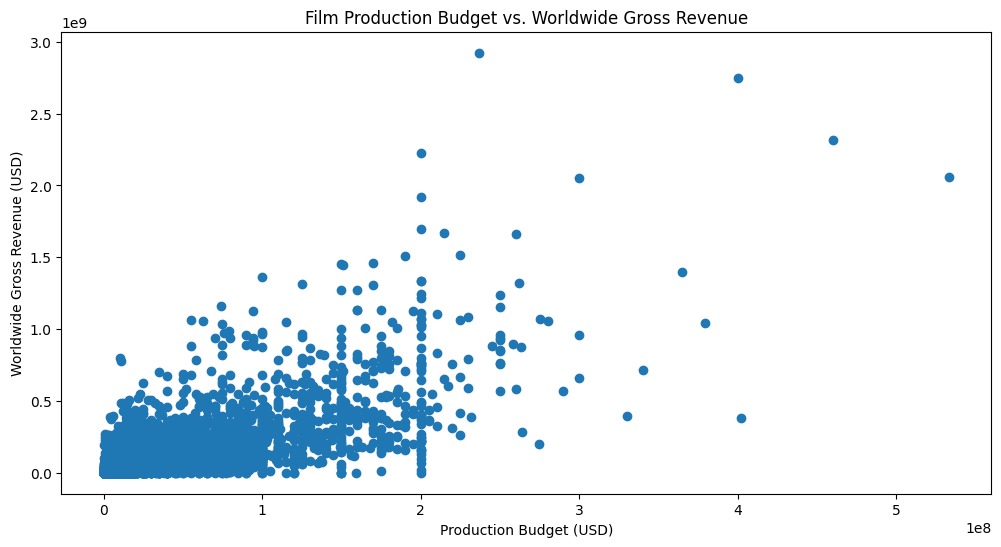

In [ ]:

plt.figure(figsize=(12, 6))
plt.title('Film Production Budget vs. Worldwide Gross Revenue')
plt.xlabel('Production Budget (USD)')
plt.ylabel('Worldwide Gross Revenue (USD)')
plt.scatter(data=data_clean, x='USD_Production_Budget', y='USD_Worldwide_Gross',
)

plt.show()

## Using Plotly

In [ ]:
scatter = px.scatter(data_clean,
                    x='USD_Production_Budget',
                    y='USD_Worldwide_Gross',
                    title='Film Production Budget vs. Worldwide Gross Revenue',
                    size='USD_Production_Budget',
                    hover_name=data_clean.Movie_Title,
                    color='USD_Worldwide_Gross')

scatter.update_layout(xaxis_title="Production Budget (USD)",
                      yaxis_title="Worldwide Gross Revenue (USD)",
                      coloraxis_colorbar_title="Worldwide Gross Revenue (USD)"
                      )

scatter.show()

### Plotting Movie Releases over Time



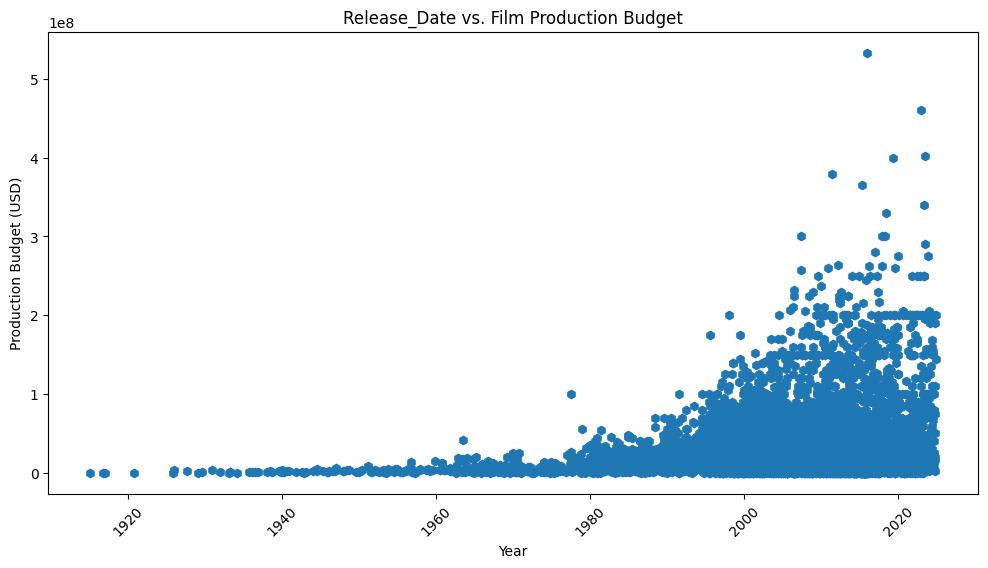

In [185]:
plt.figure(figsize=(12, 6))
plt.title('Release_Date vs. Film Production Budget')
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.ylabel('Production Budget (USD)')
plt.scatter(data=data_clean, x='Release_Date', y='USD_Production_Budget', marker='h')

plt.show()


# Converting Years to Decades Trick

 Create a column in `data_clean` that has the decade of the release.



In [191]:
dt_index = data_clean['Release_Date'].dt.year
decades = dt_index//10*10
data_clean.loc[:, 'Decade'] = decades
data_clean

,Release_Date,Movie_Title,USD_Production_Budget,USD_Domestic_Gross_In_US,USD_Worldwide_Gross,Decade
1,2015-12-16,Star Wars Ep. VII: The Force Awakens,533200000,936662225,2056046835,2010
2,2022-12-09,Avatar: The Way of Water,460000000,684075767,2317514386,2020
3,2023-06-28,Indiana Jones and the Dial of Destiny,402300000,174480468,383963057,2020
4,2019-04-23,Avengers: Endgame,400000000,858373000,2748242781,2010
5,2011-05-20,Pirates of the Caribbean: On Stranger Tides,379000000,241071802,1045713802,2010
...,...,...,...,...,...,...
"6,545",1999-04-02,Following,6000,48482,240495,1990
"6,546",2005-07-13,Return to the Land of Wonders,5000,1338,1338,2000
"6,547",2015-09-29,A Plague So Pleasant,1400,0,0,2010
"6,548",2005-08-05,My Date With Drew,1100,181041,181041,2000


### Separate the "old" (before 1969) and "New" (1970s onwards) Films

Create two new DataFrames: `old_films` and `new_films`
* `old_films` should include all the films before 1969 (up to and including 1969)
* `new_films` should include all the films from 1970 onwards
* How many films were released prior to 1970?
* What was the most expensive film made prior to 1970?

In [192]:
new_films = data_clean[data_clean.Decade >= 1970]
new_films.describe()

,Release_Date,USD_Production_Budget,USD_Domestic_Gross_In_US,USD_Worldwide_Gross,Decade
count,6231,"6,231.00","6,231.00","6,231.00","6,231.00"
mean,2007-05-19 15:33:39.258545920,"34,244,161.29","43,927,649.51","98,138,384.00","2,002.29"
min,1970-01-01 00:00:00,86.00,0.00,0.00,"1,970.00"
25%,2001-09-14 00:00:00,"6,000,000.00","1,361,278.50","4,633,943.50","2,000.00"
50%,2008-10-10 00:00:00,"18,000,000.00","17,550,872.00","29,958,228.00","2,000.00"
75%,2015-01-11 00:00:00,"42,250,000.00","53,892,162.00","102,731,267.50","2,010.00"
max,2024-11-20 00:00:00,"533,200,000.00","936,662,225.00","2,923,706,026.00","2,020.00"
std,NaN,"45,351,965.42","74,064,478.17","191,153,588.08",10.38


In [193]:
old_films = data_clean[data_clean.Decade < 1970]
old_films.describe()

,Release_Date,USD_Production_Budget,USD_Domestic_Gross_In_US,USD_Worldwide_Gross,Decade
count,167,167.00,167.00,167.00,167.00
mean,1954-08-18 18:58:12.215568832,"4,341,237.05","21,446,616.54","28,872,428.01","1,949.22"
min,1915-02-08 00:00:00,"60,000.00",0.00,0.00,"1,910.00"
25%,1946-10-03 00:00:00,"1,200,000.00","3,500,000.00","3,850,000.00","1,940.00"
50%,1956-12-23 00:00:00,"2,660,000.00","9,250,000.00","9,261,253.00","1,950.00"
75%,1964-12-13 00:00:00,"5,000,000.00","26,600,000.00","31,089,389.00","1,960.00"
max,1969-12-19 00:00:00,"42,000,000.00","198,680,470.00","390,516,513.00","1,960.00"
std,NaN,"5,548,255.97","32,281,773.30","53,412,976.73",12.66


# Seaborn Regression Plots

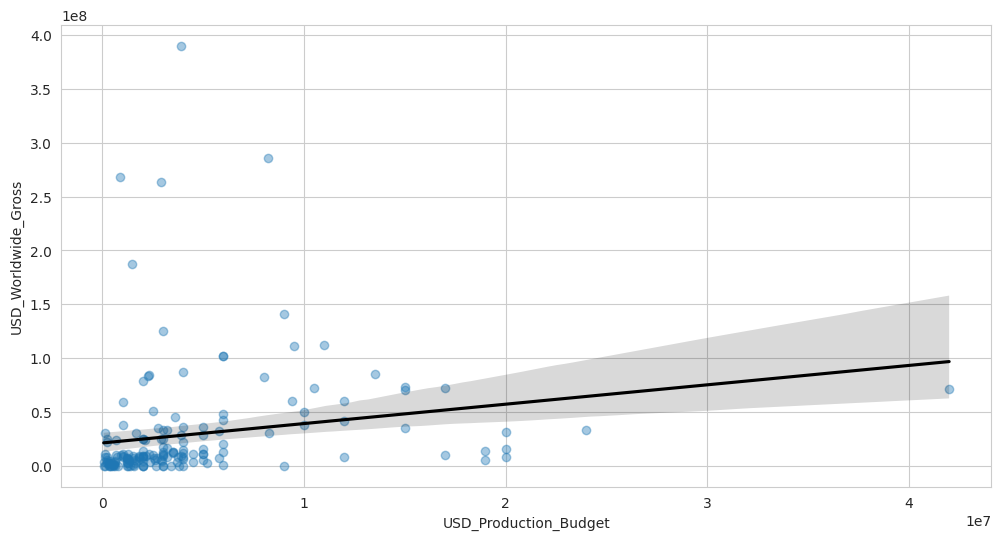

In [201]:
plt.figure(figsize=(12,6))
with sns.axes_style("whitegrid"):
  sns.regplot(data=old_films,
            x='USD_Production_Budget',
            y='USD_Worldwide_Gross',
            scatter_kws = {'alpha': 0.4},
            line_kws = {'color': 'black'})

Seaborn's `.regplot()` to show the scatter plot and linear regression line against the `new_films`.
<br>
<br>

Interpret the chart

* Do our data points for the new films align better or worse with the linear regression than for our older films?
* Roughly how much would a film with a budget of $150 million make according to the regression line?

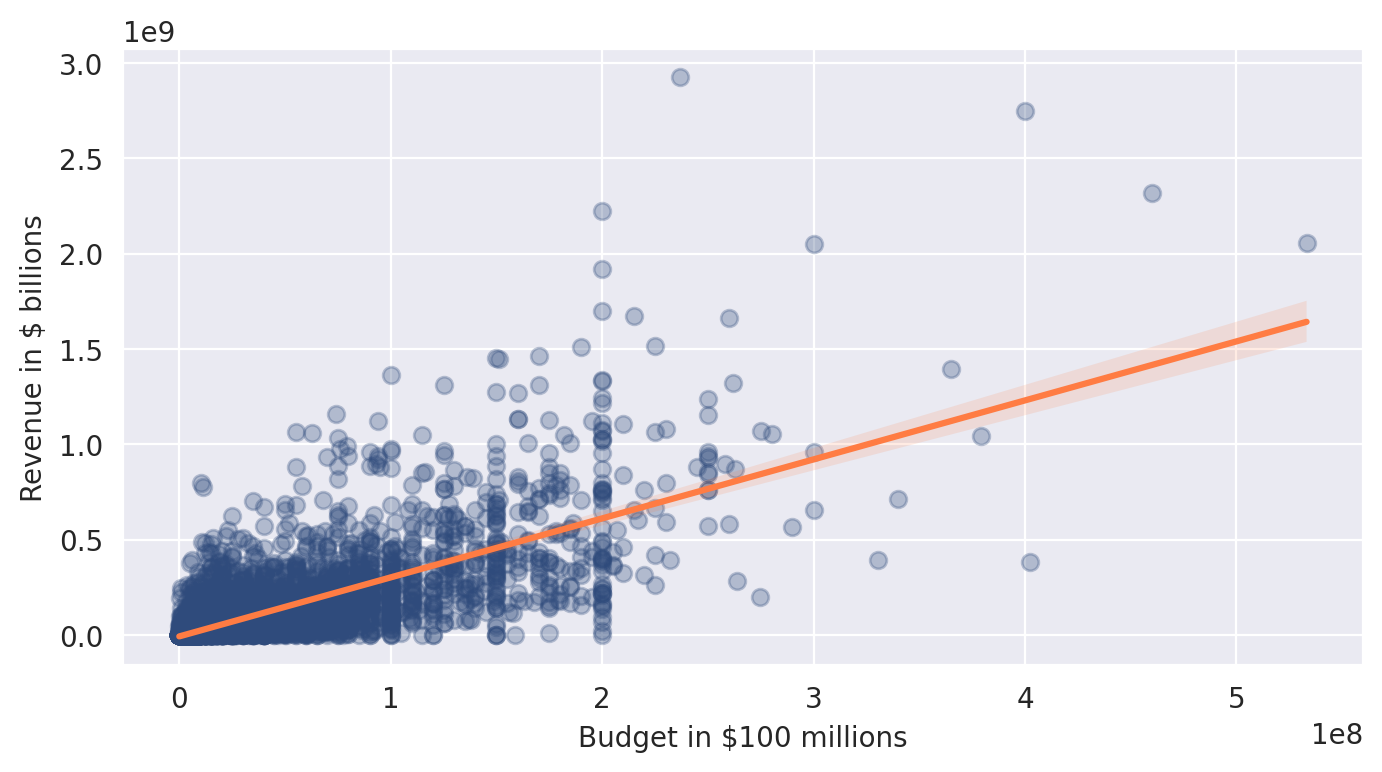

In [202]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style('darkgrid'):
  ax = sns.regplot(data=new_films,
                   x='USD_Production_Budget',
                   y='USD_Worldwide_Gross',
                   color='#2f4b7c',
                   scatter_kws = {'alpha': 0.3},
                   line_kws = {'color': '#ff7c43'})

  ax.set(
         ylabel='Revenue in $ billions',
         xlabel='Budget in $100 millions')

# Running Regression with scikit-learn

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

In [203]:
regression = LinearRegression()

 a linear regression for the `new_films`. Calculate the intercept, slope and r-squared. How much of the variance in movie revenue does the linear model explain in this case?

In [204]:
# Explanatory Variable(s) or Feature(s)
X = pd.DataFrame(new_films, columns=['USD_Production_Budget'])

# Response Variable or Target
y = pd.DataFrame(new_films, columns=['USD_Worldwide_Gross'])

In [205]:
# Find the best-fit line
regression.fit(X, y)

LinearRegression()

In [216]:
# theta one(slope)
regression.coef_

array([[3.09412509]])

In [217]:
# theta zero
regression.intercept_

array([-7817334.78935112])

One measure of figuring out how well our model fits our data is by looking at a metric called r-squared. This is a good number to look at in addition to eyeballing our charts.


In [218]:
regression.score(X, y)

0.5388936338160903

In [214]:
regression.predict([[350000000]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([[1.07512645e+09]])

# Use Your Model to Make a Prediction

We just estimated the slope and intercept! Remember that our Linear Model has the following form:

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

How much global revenue does our model estimate for a film with a budget of $350 million?

In [215]:
budget = 350000000
revenue_estimate = regression.intercept_[0] + regression.coef_[0,0]*budget
revenue_estimate = round(revenue_estimate, -6)
print(f'The estimated revenue for a $350m film is around ${revenue_estimate:.10}.')


The estimated revenue for a $350m film is around $1.075e+09.
